# WeatherPy
----

In [49]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from citipy import citipy
from api_JAK import api_key

# CSV with collected data
output_data_file = 'output_data/cities.csv'

# Set ranges of potential latitudes and longitudes
lat_set = (-90, 90)
long_set = (-180, 180)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## Generate Cities List

In [2]:
# create emply lists for coordinates, cities/searchable city names, and country codes
lat_longs = []
cities = []
search_cities = [] # replaces each :space: in city name with :+: symbol allowing for usage in API web address
countries = []

# Create a set (min 500 :RESULTS:) of random coordinates
lats = np.random.uniform(low = -90.0000, high = 90.0000, size = 2000)
longs = np.random.uniform(low = -180.0000, high = 180.0000, size = 2000)
lat_longs = zip(lats, longs)

# Identify nearest city for each set of coordinates, add only if not already in list
for lat_long in lat_longs:
    city_name = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    country_code = citipy.nearest_city(lat_long[0], lat_long[1]).country_code
    if city_name not in cities:
        cities.append(city_name)
        countries.append(country_code)

# Loop to clean cities for search_cities list. 
# Replaces the spaces in multi-word city names (so the address doesn't 'break' at space in API address)
for city in cities:
        readble_city = city.replace(' ', '+') # could alternately use '%20' instead of the '+', both work for this API!
        search_cities.append(readble_city)

# generate searchable item list for API
search_list = list(zip(search_cities, countries))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base API url for calls
url = 'http://api.openweathermap.org/data/2.5/weather?appid='
units = 'imperial'

In [4]:
# # # # # # # # # # # # # # # # # #
#  API ADDRESS/JSON REVIEW BLOCK  #
# # # # # # # # # # # # # # # # # #

#  review data retrieved in call

# #  test variables - replace both of these with proper variables in iterable code
# city = 'Orlando'
# country = 'US'

# city_url = url + api_key + '&units=' + units + '&q=' + city + ',' + country
# response = requests.get(city_url) 
# weather_data = response.json() 

# #   test dumps for reading json retrieval
# print(json.dumps(weather_data, indent=3, sort_keys=True))

# #   test URL retrieval
# print(response.url)

In [5]:
city_cap = [] # duplicates info from cities variable, but in a nicer format (proper capitalization)
country_cap = [] # duplicates info from countries variable, but in a nicer format (proper capitalization)
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
dates = []
failure_count = []


print('''
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=                                                 Processing Records                                                  =
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

''')


for call_count in range(len(search_list)):
    try:
        city_url = (url + api_key + '&units='+ units + '&q=' + search_list[call_count][0] + ',' + search_list[call_count][1])
        weather_data = requests.get(city_url).json() 

        if weather_data["cod"] == '404':
            call_count += 1
            failure_count.append(f'City Call {call_count}')
            print(f'City Call {call_count}: ***** FAILED: City Not Found *****')
        elif weather_data["main"]["humidity"] >= 101:
            call_count += 1
            failure_count.append(f'City Call {call_count}')
            print(f'City Call {call_count}: {city_log}, {country_log} ***** DATA OUT OF BOUNDS: City Not Included *****')
        else:
            city_cap.append(weather_data["name"])
            city_log = weather_data["name"]
            country_cap.append(weather_data["sys"]["country"])
            country_log = weather_data["sys"]["country"]
            lat.append(weather_data["coord"]["lat"])
            temp.append(weather_data["main"]["temp_max"])
            humidity.append(weather_data["main"]["humidity"])
            cloudiness.append(weather_data["clouds"]["all"])
            wind_speed.append(weather_data["wind"]["speed"])
            timestamp = datetime.fromtimestamp(weather_data['dt']).strftime('%m/%d/%Y')
            dates.append(timestamp)

            print(f'City Call {call_count + 1}:  {city_log}, {country_log}')

#         print(city_url) ## *removed print function to drop URLs displaying API
        call_count += 1

    except:
        print('= + = + = + = + = + = +     ERROR     + = + = + = + = + = + =')
    pass  ## trying pass instead of continue


print('''
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=                                              Data Collection Complete!                                              =
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
''')


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=                                                 Processing Records                                                  =
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


City Call 1:  Sao Miguel do Araguaia, BR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=sao+miguel+do+araguaia,br
City Call 2:  Mar del Plata, AR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=mar+del+plata,ar
City Call 3:  Ushuaia, AR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=ushuaia,ar
City Call 4:  Kaeo, NZ
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kaeo,nz
City Call 5:  Bongandanga, CD
http://api.

City Call 55:  Atuona, PF
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=atuona,pf
City Call 56: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kismayo,so
City Call 57:  Lazaro Cardenas, MX
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=lazaro+cardenas,mx
City Call 58:  Puerto Ayora, EC
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=puerto+ayora,ec
City Call 59:  Qaanaaq, GL
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=qaanaaq,gl
City Call 60:  Lyuban, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=lyuban,ru
City Call 61:  Luderitz, NA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f4

City Call 110:  Great Yarmouth, GB
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=great+yarmouth,gb
City Call 111:  Kualakapuas, ID
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kualakapuas,id
City Call 112: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=sentyabrskiy,ru
City Call 113:  Broome, AU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=broome,au
City Call 114:  Ixtapa, MX
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=ixtapa,mx
City Call 115:  Kuala Lipis, MY
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kuala+lipis,my
City Call 116:  Minas de Barroteran, MX
http://api.openweathermap.org/data/2.5/weather?appid=d0

City Call 166:  Turbat, PK
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=turbat,pk
City Call 167:  Bellefontaine, US
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=bellefontaine,us
City Call 168:  Hithadhoo, MV
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=hithadhoo,mv
City Call 169:  Alakurtti, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=alakurtti,ru
City Call 170:  Georgetown, SH
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=georgetown,sh
City Call 171:  Nuuk, GL
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=nuuk,gl
City Call 172:  Lorengau, PG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&

City Call 222:  Awjilah, LY
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=awjilah,ly
City Call 223:  Lieksa, FI
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=lieksa,fi
City Call 224:  Alamosa, US
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=alamosa,us
City Call 225: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=malakal,sd
City Call 226:  Rio Grande, BR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=rio+grande,br
City Call 227:  Amboasary, MG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=amboasary,mg
City Call 228: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dc

City Call 278:  Taormina, IT
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=taormina,it
City Call 279:  Colares, PT
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=colares,pt
City Call 280:  Puerto Madryn, AR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=puerto+madryn,ar
City Call 281:  Shirakawa, JP
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=shirakawa,jp
City Call 282:  Alekseyevsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=alekseyevsk,ru
City Call 283:  Waingapu, ID
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=waingapu,id
City Call 284:  Taltal, CL
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=i

City Call 335:  Jhanjharpur, IN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=jhanjharpur,in
City Call 336:  Vaasa, FI
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=vaasa,fi
City Call 337:  Zhigansk, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=zhigansk,ru
City Call 338:  Chepareria, KE
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=chepareria,ke
City Call 339:  Yerbogachen, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=yerbogachen,ru
City Call 340:  Tigil, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=tigil,ru
City Call 341:  Shenjiamen, CN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&

City Call 391:  College, US
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=college,us
City Call 392:  Rock Sound, BS
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=rock+sound,bs
City Call 393:  Damphu, BT
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=damphu,bt
City Call 394:  Beyneu, KZ
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=beyneu,kz
City Call 395:  Eenhana, NA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=eenhana,na
City Call 396:  Lichinga, MZ
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=lichinga,mz
City Call 397:  Kalmunai, LK
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kalmunai,lk


City Call 447:  Rawatsar, IN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=rawatsar,in
City Call 448:  Bambanglipuro, ID
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=bambanglipuro,id
City Call 449: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=ondorhaan,mn
City Call 450:  Deputatskiy, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=deputatskiy,ru
City Call 451:  Terrace, CA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=terrace,ca
City Call 452:  Voyvozh, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=voyvozh,ru
City Call 453:  Bregenz, AT
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ff

City Call 504:  Santa Fe, CU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=santa+fe,cu
City Call 505:  Jefferson City, US
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=jefferson+city,us
City Call 506:  Umiray, PH
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=umiray,ph
City Call 507:  Caceres, ES
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=caceres,es
City Call 508:  Narsipatnam, IN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=narsipatnam,in
City Call 509:  Bardiyah, LY
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=bardiyah,ly
City Call 510:  Daru, PG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperia

City Call 561:  Jiexiu, CN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=jiexiu,cn
City Call 562:  Sobolevo, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=sobolevo,ru
City Call 563:  Yeniseysk, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=yeniseysk,ru
City Call 564:  Aksu, CN
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=aksu,cn
City Call 565: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=birin,dz
City Call 566:  Albury, AU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=albury,au
City Call 567:  Antalaha, MG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=

City Call 617:  Samarai, PG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=samarai,pg
City Call 618: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=urdzhar,kz
City Call 619:  Bealanana, MG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=bealanana,mg
City Call 620:  Gilgit, PK
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=gilgit,pk
City Call 621:  Spaichingen, DE
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=spaichingen,de
City Call 622: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=chagda,ru
City Call 623:  Corrente, BR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5

City Call 673:  Waiouru, NZ
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=waiouru,nz
City Call 674:  Sabzevar, IR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=sabzevar,ir
City Call 675:  Bernay, FR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=bernay,fr
City Call 676:  Missoula, US
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=missoula,us
City Call 677:  Agirish, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=agirish,ru
City Call 678:  Zhob, PK
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=zhob,pk
City Call 679:  Somerset East, ZA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=somerset+east,z

City Call 729:  Kroya, ID
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=kroya,id
City Call 730:  Cap Malheureux, MU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=cap+malheureux,mu
City Call 731:  Walvis Bay, NA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=walvis+bay,na
City Call 732:  Chipinge, ZW
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=chipinge,zw
City Call 733:  Hofn, IS
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=hofn,is
City Call 734:  Beisfjord, NO
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=beisfjord,no
City Call 735: ***** FAILED: City Not Found *****
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f4

In [6]:
# quick review/validation of lists 
print(f'''
{len(search_list)} random, unique cities generated.

{len(failure_count)} FAILURES TO CALL:
----------------------------------------------------------------------------------------------------------------------------
{failure_count}


Complete data will have {len(search_list) - len(failure_count)} items.

Item Count:
{len(city_cap)} Cities
{len(country_cap)} Countries
{len(lat)} Latitudes
{len(temp)} Temperatures
{len(humidity)} Humidity Percentages
{len(cloudiness)} Cloudiness Percentages
{len(wind_speed)} Wind Speeds
{len(dates)} Dates
''')


768 random, unique cities generated.

96 FAILURES TO CALL:
----------------------------------------------------------------------------------------------------------------------------
['City Call 11', 'City Call 24', 'City Call 26', 'City Call 41', 'City Call 47', 'City Call 51', 'City Call 52', 'City Call 56', 'City Call 65', 'City Call 69', 'City Call 83', 'City Call 84', 'City Call 86', 'City Call 88', 'City Call 92', 'City Call 97', 'City Call 101', 'City Call 105', 'City Call 109', 'City Call 112', 'City Call 118', 'City Call 119', 'City Call 125', 'City Call 146', 'City Call 176', 'City Call 188', 'City Call 189', 'City Call 193', 'City Call 203', 'City Call 205', 'City Call 209', 'City Call 213', 'City Call 215', 'City Call 218', 'City Call 225', 'City Call 228', 'City Call 229', 'City Call 241', 'City Call 247', 'City Call 260', 'City Call 264', 'City Call 266', 'City Call 267', 'City Call 287', 'City Call 309', 'City Call 313', 'City Call 318', 'City Call 328', 'City Call 329

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
city_weather_df = (pd.DataFrame({'City': city_cap, 
                                 'Country': country_cap, 
                                 'Latitude': lat, 
                                 'Temperature (F)': temp, 
                                 'Humidity (%)': humidity, 
                                 'Cloudiness (%)': cloudiness, 
                                 'Wind Speed (mph)': wind_speed, 
                                 'Date Reported': dates}))
city_weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Reported
0,Sao Miguel do Araguaia,BR,-13.28,94.52,23,67,3.09,07/12/2019
1,Mar del Plata,AR,-46.43,42.32,65,100,3.80,07/12/2019
2,Ushuaia,AR,-54.81,37.40,93,75,5.82,07/12/2019
3,Kaeo,NZ,-35.10,46.99,95,4,1.99,07/12/2019
4,Bongandanga,CD,1.51,82.64,59,18,4.43,07/12/2019


In [70]:
bad_data_df = city_weather_df[city_weather_df['Humidity (%)'] >= 101]

bad_data_df.head(1000)

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Reported
525,Iquitos,PE,-3.75,42.8,319,75,3.36,07/12/2019


In [78]:
city_weather_df.drop(525, inplace = True)

KeyError: '[525] not found in axis'

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Reported


In [30]:
city_weather_df.count()

City                672
Country             672
Latitude            672
Temperature (F)     672
Humidity (%)        672
Cloudiness (%)      672
Wind Speed (mph)    672
Date Reported       672
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

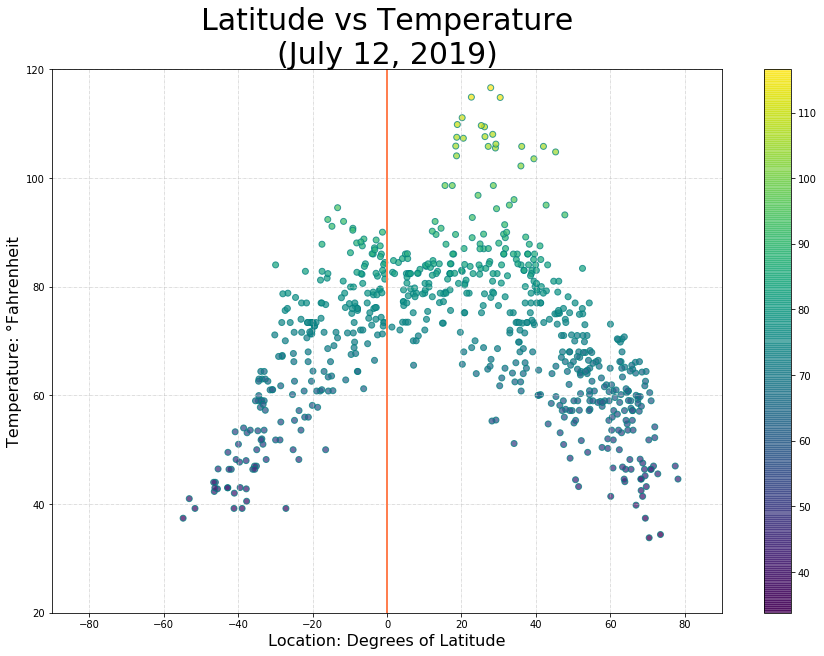

In [104]:
## insert a heavier line at lat/x = 0 to indicate EQUATOR
# variable for DATE in plots : represents date the information is called
called_on = datetime.now().strftime('%B %d, %Y')

plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Temperature (F)'], 
            marker = 'o', 
            c = city_weather_df['Temperature (F)'],
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title((f'Latitude vs Temperature\n({called_on})'), fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Temperature: °Fahrenheit', fontsize = 16)
plt.ylim (20, 120)

# Add light grid with axis line for equator
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)
plt.axvline(linewidth = 2, color = 'coral')

# Show colorbar
plt.colorbar()

plt.show()

#### Latitude vs. Humidity Plot

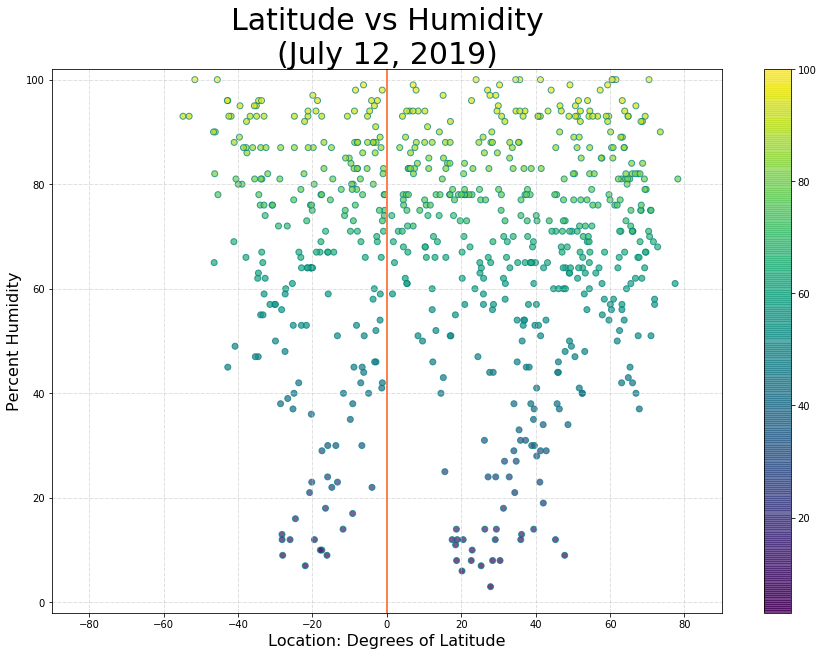

In [103]:
## insert a heavier line at lat/x = 0 to indicate EQUATOR
## insert a colored line at y = to indicate 0

plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity (%)'], 
            marker = 'o', 
            c = city_weather_df['Humidity (%)'],
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title((f'Latitude vs Humidity\n({called_on})'), fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Percent Humidity', fontsize = 16)
plt.ylim (-2, 102)

# Add light grid with axis line for equator
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)
plt.axvline(linewidth = 2, color = 'coral')

# Show colorbar
plt.colorbar()

plt.show()

#### Latitude vs. Cloudiness Plot

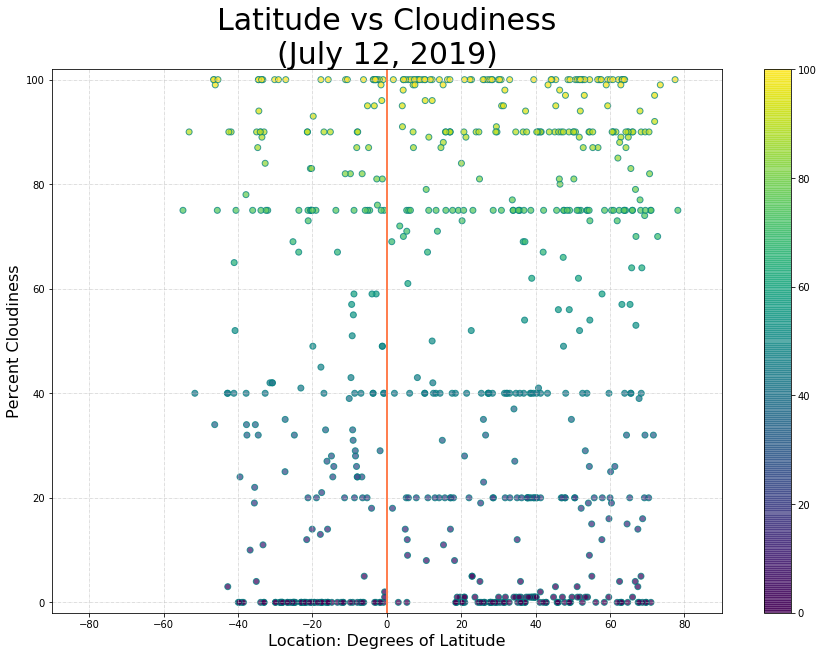

In [105]:
## insert a heavier line at lat/x = 0 to indicate EQUATOR
## insert a colored line at y = to indicate 0

plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness (%)'], 
            marker = 'o', 
            c = city_weather_df['Cloudiness (%)'],
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title((f'Latitude vs Cloudiness\n({called_on})'), fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Percent Cloudiness', fontsize = 16)
plt.ylim (-2, 102)

# Add light grid with axis line for equator
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)
plt.axvline(linewidth = 2, color = 'coral')

# Show colorbar
plt.colorbar()

plt.show()

#### Latitude vs. Wind Speed Plot

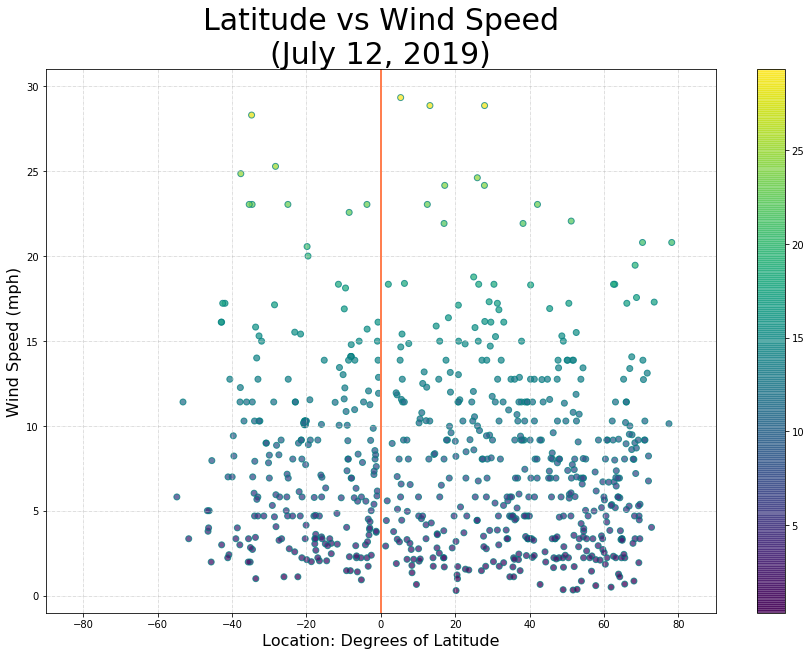

In [106]:
plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed (mph)'], 
            marker = 'o', 
            c = city_weather_df['Wind Speed (mph)'],            
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title((f'Latitude vs Wind Speed\n({called_on})'), fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Wind Speed (mph)', fontsize = 16)
plt.ylim (-1, 31)

# Add light grid with axis line for equator
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)
plt.axvline(linewidth = 2, color = 'coral')

# Show colorbar
plt.colorbar()

plt.show()